<img src="images/banner.png" alt="Folded outcrop" />

In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_laurent2016
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import logging
# logging.getLogger().setLevel(logging.INFO)

In [2]:
# load in the data from the provided examples
data, bb = load_laurent2016()
# bb[1,2] = 10000

In [5]:
newdata = pd.DataFrame([[5923.504395,4748.135254,3588.621094,'s2',1.0]],columns=['X','Y','Z','type','val'])
data = pd.concat([data,newdata],sort=False)
data[np.logical_and(data['type'] == 's2',np.isnan(data['nx']))]
data.loc[np.logical_and(data['type'] == 's0',~np.isnan(data['val'])),'type'] = 's01'


In [7]:
rotation = [-69.11979675292969, 15.704944610595703, 6.00014591217041]

### Modelling S2

Add some more and try again.
Add some more and try again.



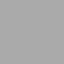

In [9]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
s2 = model.create_and_add_fold_frame('s2',
                                     nelements=10000, 
                                     buffer=0.5,
                                    solver='lu',
                                    damp=True)
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s2['feature'][0],
                       cmap='prism')
viewer.add_isosurface(s2['feature'][0],
                     slices=[0,1])
viewer.add_data(s2['feature'][0])
viewer.rotate(rotation)
viewer.interactive()
# viewer.display()


### Modelling S1

In [10]:
s1 = model.create_and_add_folded_fold_frame('s1',
                                            limb_wl=4, 
                                            av_fold_axis=True,
                                            nelements=50000,
                                            buffer=0.3,
                                            solver='lu'
                                           )



Add some more and try again.
Add some more and try again.



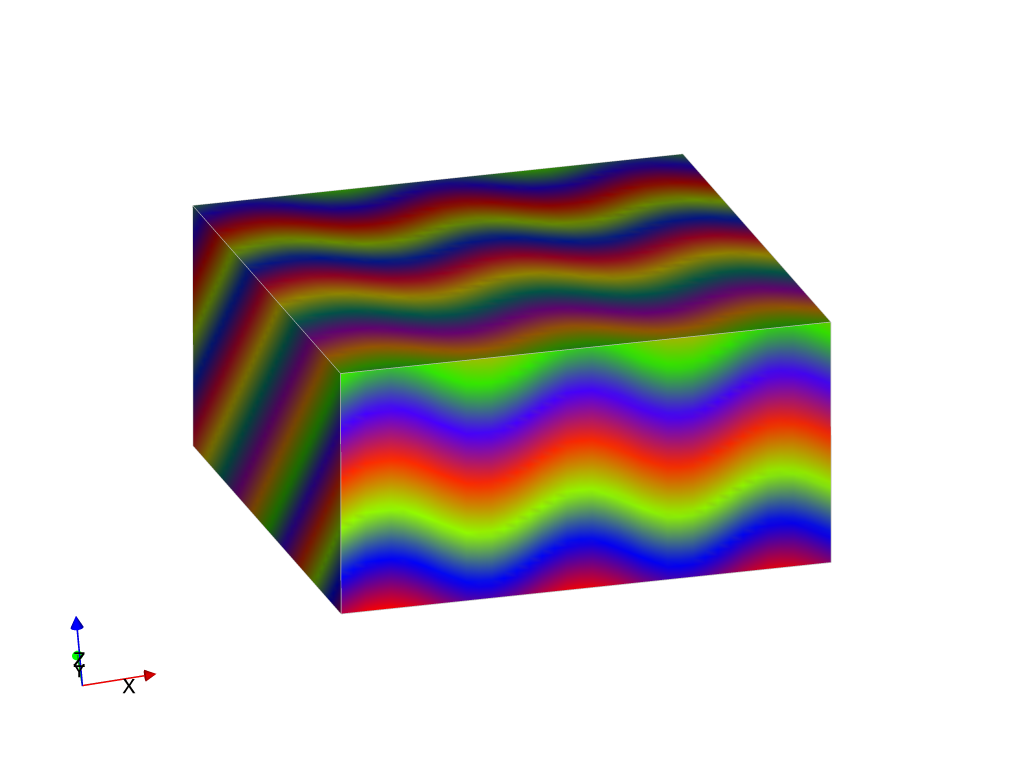

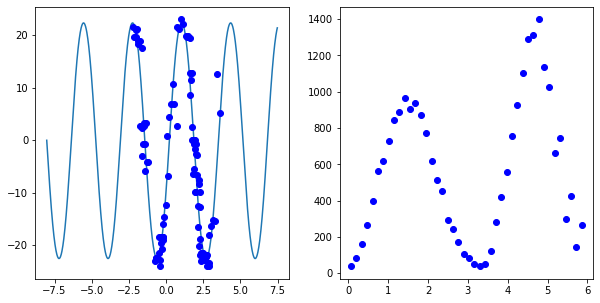

In [11]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s1['feature'][0],
                       cmap='prism')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

fig, ax = plt.subplots(1,2,figsize=(10,5))
x = np.linspace(s2['feature'][0].min(),s2['feature'][0].max(),1000)
ax[0].plot(x,s1['fold'].fold_limb_rotation(x))
ax[0].plot(s1['foliation'],s1['limb_rotation'],'bo')
ax[1].plot(s1['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

### Modelling S0

In [12]:
s0 = model.create_and_add_folded_foliation('s0',
                                            limb_wl=1., 
                                            av_fold_axis=True,
                                            nelements=50000,
                                            buffer=0.2,
                                            damp=True,
                                           solver='lu'
                                           )


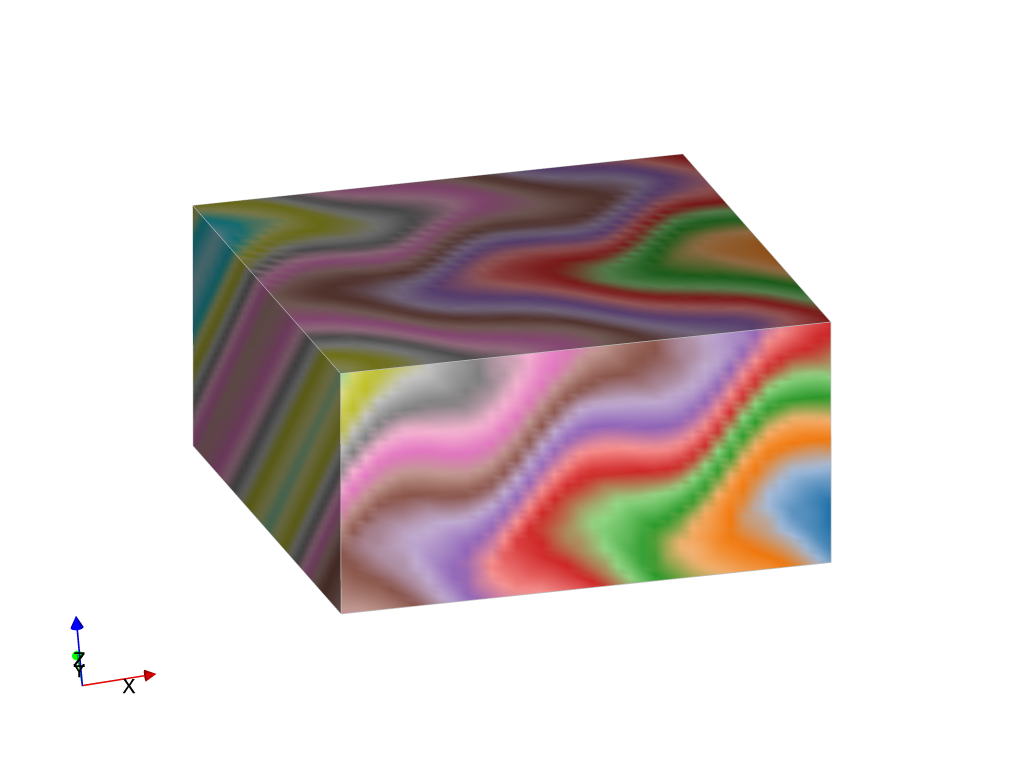

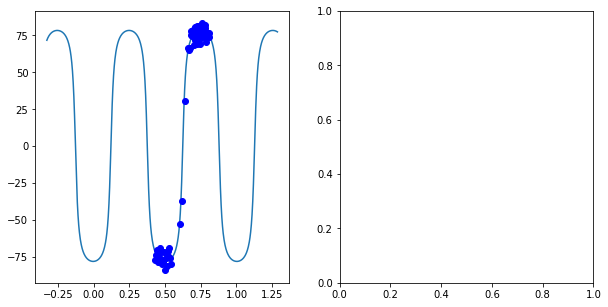

In [13]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s0['feature'],
                       cmap='tab20')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

fig, ax = plt.subplots(1,2,figsize=(10,5))
x = np.linspace(s1['feature'][0].min(),s1['feature'][0].max(),1000)
ax[0].plot(x,s0['fold'].fold_limb_rotation(x))
ax[0].plot(s0['foliation'],s0['limb_rotation'],'bo')
# ax[1].plot(s0['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')


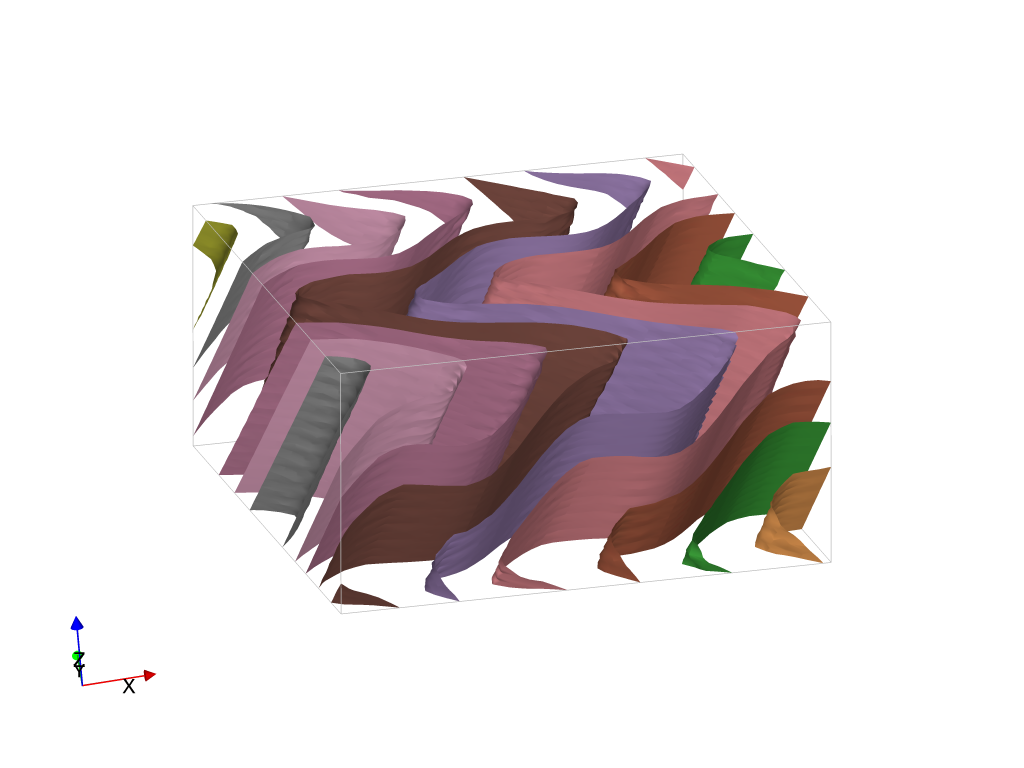

In [14]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(s0['feature'],nslices=10,paint_with=s0['feature'],cmap='tab20')
# viewer.add_data(s0['feature'])
# viewer.add_fold(s0['fold'],locations=s0['support'].barycentre()[::80])
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()